In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
data_dir = 'G:\\Databases\\Python Database\\flower_photos'
os.listdir(data_dir)

['test', 'train']

In [3]:
train_set = data_dir + '\\train\\'
test_set  = data_dir + '\\test\\'

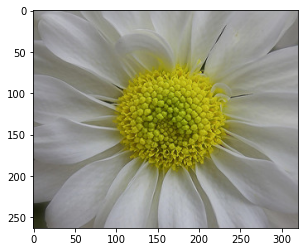

In [4]:
os.listdir(train_set + '\\daisy\\')[0]
sample_image = train_set + '\\daisy\\'+'100080576_f52e8ee070_n.jpg'
plt.imshow(imread(sample_image))

In [5]:
image_shape = (28,28,3)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(rotation_range=20,
                                           width_shift_range = 0.1,
                                           height_shift_range=0.1,
                                           shear_range=0.1,
                                           zoom_range=0.1,
                                           horizontal_flip = True,
                                           fill_mode = 'nearest')

In [7]:
img_gen.flow_from_directory(train_set)
img_gen.flow_from_directory(test_set)

Found 2946 images belonging to 5 classes.
Found 724 images belonging to 5 classes.


In [8]:
batch_size = 16
train_image_gen  = img_gen.flow_from_directory(train_set,
                                               target_size = image_shape[:2],
                                               color_mode = 'rgb',
                                               batch_size = batch_size,
                                               class_mode = 'binary')
test_image_gen = img_gen.flow_from_directory(test_set,
                                             target_size = image_shape[:2],
                                             color_mode = 'rgb',
                                             batch_size = batch_size,
                                             class_mode = 'binary')

train_image_gen.class_indices
test_image_gen.class_indices

Found 2946 images belonging to 5 classes.
Found 724 images belonging to 5 classes.


{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape = image_shape,activation='relu',padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu',padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=5,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Instance of early stopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0

In [11]:
model.fit_generator(train_image_gen,epochs=50,validation_data=(test_image_gen),callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 185 steps, validate for 46 steps
Epoch 1/50
185/185 [==============================] - 62s 333ms/step - loss: 1.6875 - accuracy: 0.2193 - val_loss: 1.5803 - val_accuracy: 0.2445
Epoch 2/50
185/185 [==============================] - 50s 272ms/step - loss: 1.5285 - accuracy: 0.2875 - val_loss: 1.4394 - val_accuracy: 0.3398
Epoch 3/50
185/185 [==============================] - 11s 57ms/step - loss: 1.3719 - accuracy: 0.3955 - val_loss: 1.3219 - val_accuracy: 0.4351
Epoch 4/50
185/185 [==============================] - 11s 57ms/step - loss: 1.3153 - accuracy: 0.4474 - val_loss: 1.2597 - val_accuracy: 0.4558
Epoch 5/50
185/185 [==============================] - 12s 64ms/step - loss: 1.2168 - accuracy: 0.4963 - val_loss: 1.1526 - val_accuracy: 0.5110
Epoch 6/50
185/185 [==============================] - 17s 90ms/step - loss: 1.1457 - accuracy: 0.5305 - val_l

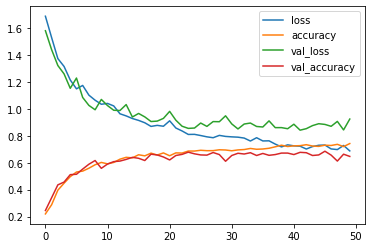

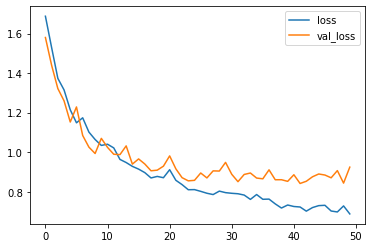

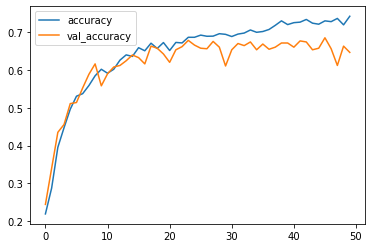

In [12]:
results = pd.DataFrame(model.history.history)
results.plot()
results[['loss','val_loss']].plot()
results[['accuracy','val_accuracy']].plot()

In [13]:
print('Loss: ',model.evaluate_generator(test_image_gen)[0],
      'Accuracy: ',model.evaluate_generator(test_image_gen)[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Loss:  0.9238691718681998 Accuracy:  0.6270718


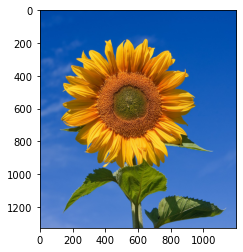

In [14]:
test_img = 'test.jpg'
plt.imshow(imread(test_img))

In [15]:
from tensorflow.keras.preprocessing import image


new_img = image.load_img(test_img,target_size=image_shape) #loading image as a tensor for the model
new_img   # Checking the image after converting it to tensor
new_img_array = image.img_to_array(new_img)  # converting the tensor to an array form on which the model predict on

new_img_array.shape  #(28,28,3)
new_img_array = np.expand_dims(new_img_array,axis=0) 

In [19]:
probabilities = model.predict(new_img_array)  #predicting the probabilites of the classes

print(list(train_image_gen.class_indices)[0],":",probabilities[0][0]*100,'%\n',
      list(train_image_gen.class_indices)[1],":",probabilities[0][1]*100,'%\n',
      list(train_image_gen.class_indices)[2],":",probabilities[0][2]*100,'%\n',
      list(train_image_gen.class_indices)[3],":",probabilities[0][3]*100,'%\n',
      list(train_image_gen.class_indices)[4],":",probabilities[0][4]*100,'%')

daisy : 0.0006982599643379217 %
 dandelion : 0.005730973134632222 %
 roses : 0.00015731051234979532 %
 sunflowers : 99.97350573539734 %
 tulips : 0.019919603073503822 %
